In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [53]:
data = pd.read_csv('IBM Attrition Data.csv')

In [54]:
data.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


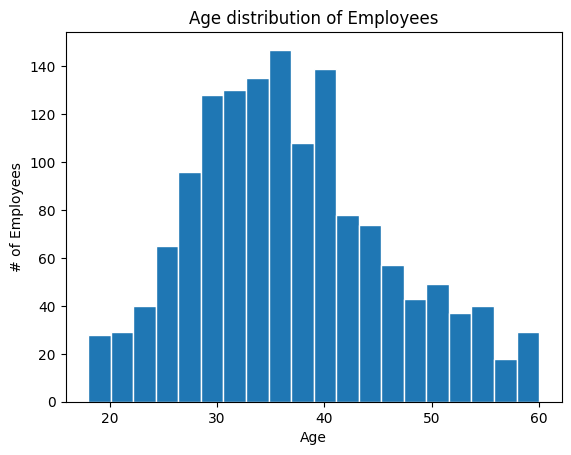

In [61]:
# age distribution of employees
plt.hist(data['Age'],edgecolor='white',bins=20)
plt.title("Age distribution of Employees")
plt.xlabel("Age")
plt.ylabel("# of Employees")
plt.show()

In [62]:
data['Age'].value_counts()

Age
35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: count, dtype: int64

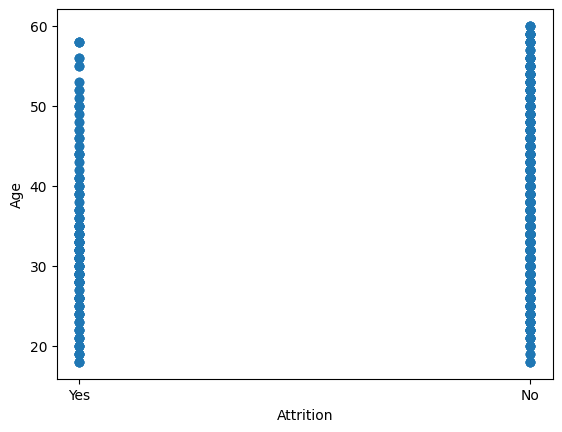

In [66]:
# Explore attrition by age
plt.scatter(data.Attrition,data.Age)
plt.ylabel("Age")
plt.xlabel("Attrition")
plt.show()

In [99]:
# Explore data for Left employees
df = pd.DataFrame(data['Attrition'].value_counts())

In [100]:
df = df.reset_index()

In [101]:
df

,Attrition,count
0,No,1233
1,Yes,237


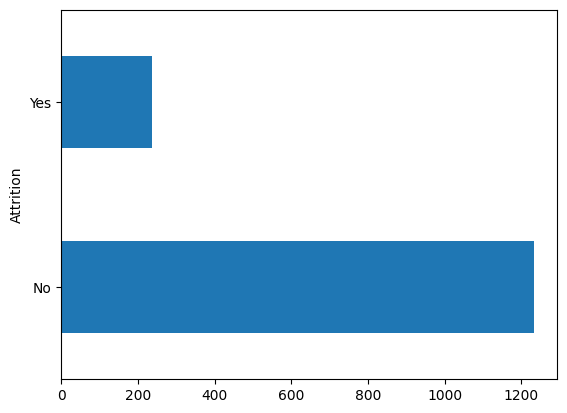

In [82]:
# way 2
data['Attrition'].value_counts().plot(kind='barh')
plt.show()

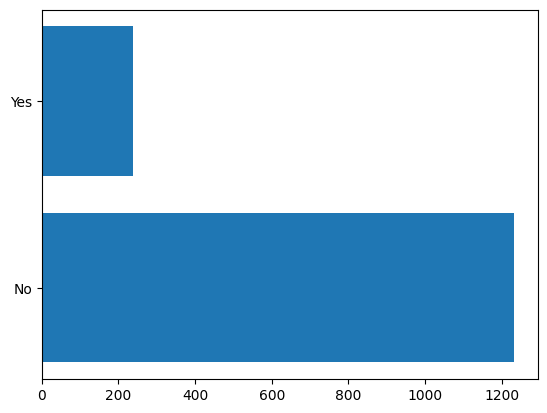

In [102]:
# way 1 
plt.barh(df['Attrition'],df['count'])
plt.show()

In [103]:
# Find out the distribution of employees by the education field
data['EducationField'].value_counts()

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

In [108]:
# Give a bar chart for the number of married and unmarried employees
df2 = pd.DataFrame(data['MaritalStatus'].value_counts())



In [109]:
df2 = df2.reset_index()

In [110]:
df2

,MaritalStatus,count
0,Married,673
1,Single,470
2,Divorced,327


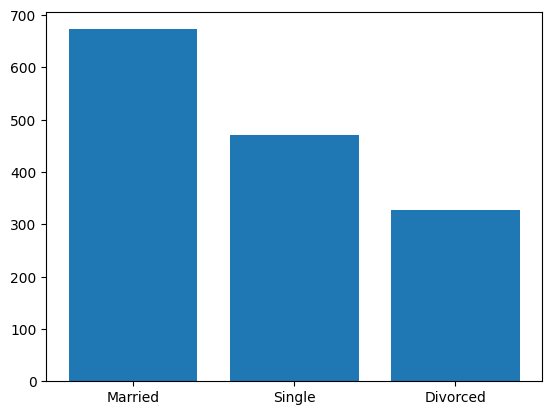

In [112]:
plt.bar(df2['MaritalStatus'],df2['count'])
plt.show()

In [113]:
# Build up a logistic regression model to predict which employees are likely to attrite
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
 13  newatt                   1470 non-null   int64 
dtypes: int64(10), object(4)
memory usage: 16

In [124]:
data['Attrition'].replace('Yes',1, inplace=True)
data['Attrition'].replace('No',0, inplace=True)

In [125]:
data['EducationField'].replace('Life Sciences',1, inplace=True)
data['EducationField'].replace('Medical',2, inplace=True)
data['EducationField'].replace('Marketing', 3, inplace=True)
data['EducationField'].replace('Other',4, inplace=True)
data['EducationField'].replace('Technical Degree',5, inplace=True)
data['EducationField'].replace('Human Resources', 6, inplace=True)

In [127]:
data['Department'].replace('Research & Development',1, inplace=True)
data['Department'].replace('Sales',2, inplace=True)
data['Department'].replace('Human Resources', 3, inplace=True)

In [128]:
data['MaritalStatus'].replace('Married',1, inplace=True)
data['MaritalStatus'].replace('Single',2, inplace=True)
data['MaritalStatus'].replace('Divorced',3, inplace=True)

In [129]:
X = data.drop(['Attrition'],axis=1)
X.head()


,Age,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany,newatt
0,41,2,1,2,1,2,4,2,5993,8,1,6,1
1,49,1,8,1,1,3,2,1,5130,1,3,10,0
2,37,1,2,2,4,4,3,2,2090,6,3,0,1
3,33,1,3,4,1,4,3,1,2909,1,3,8,0
4,27,1,2,1,2,1,2,1,3468,9,3,2,0


In [130]:
y = data[['Attrition']]
y.head()

,Attrition
0,1
1,0
2,1
3,0
4,0


In [131]:
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=5)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1102, 13) (368, 13) (1102, 1) (368, 1)


In [132]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [133]:
y_predicted = lr.predict(X_test)

In [134]:
print(y_predicted)

[1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0]


In [135]:
y_predicted_prob = lr.predict_proba(X_test)

In [136]:
print(y_predicted_prob)

[[1.97203998e-01 8.02796002e-01]
 [1.58746397e-01 8.41253603e-01]
 [9.76613690e-01 2.33863099e-02]
 [8.78778706e-01 1.21221294e-01]
 [9.74564124e-01 2.54358765e-02]
 [8.44989897e-01 1.55010103e-01]
 [1.54967668e-01 8.45032332e-01]
 [9.54154122e-01 4.58458779e-02]
 [8.45332313e-01 1.54667687e-01]
 [4.53764729e-01 5.46235271e-01]
 [9.73458672e-01 2.65413276e-02]
 [6.94105218e-01 3.05894782e-01]
 [9.13632437e-01 8.63675632e-02]
 [6.21691267e-01 3.78308733e-01]
 [7.35609208e-01 2.64390792e-01]
 [9.46526728e-01 5.34732718e-02]
 [8.90940912e-01 1.09059088e-01]
 [9.20296063e-01 7.97039366e-02]
 [6.17254857e-01 3.82745143e-01]
 [8.29416136e-01 1.70583864e-01]
 [9.08950899e-01 9.10491014e-02]
 [9.30619655e-01 6.93803454e-02]
 [9.68664551e-01 3.13354490e-02]
 [8.39419347e-01 1.60580653e-01]
 [9.98215710e-01 1.78428952e-03]
 [7.21467016e-01 2.78532984e-01]
 [9.80309087e-01 1.96909129e-02]
 [9.95660966e-01 4.33903353e-03]
 [6.40883976e-01 3.59116024e-01]
 [9.39375625e-01 6.06243748e-02]
 [9.886450

In [137]:
from sklearn import metrics

print (metrics.accuracy_score(y_test, y_predicted))

0.8858695652173914


In [138]:
print (metrics.roc_auc_score(y_test, y_predicted_prob[:, 1]))

0.9003903200624511


In [139]:
print (metrics.confusion_matrix(y_test, y_predicted))
print (metrics.classification_report(y_test, y_predicted))

[[299   6]
 [ 36  27]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       305
           1       0.82      0.43      0.56        63

    accuracy                           0.89       368
   macro avg       0.86      0.70      0.75       368
weighted avg       0.88      0.89      0.87       368



In [140]:
print(X_train)

      Age  Department  DistanceFromHome  Education  EducationField   
1084   34           2                 1          3               5  \
954    42           1                 2          1               1   
996    27           2                10          3               3   
1005   29           3                17          3               4   
1041   28           2                 5          3               2   
...   ...         ...               ...        ...             ...   
1424   35           1                 9          4               2   
1142   45           1                 5          5               2   
998    26           1                 2          1               2   
206    22           1                 5          3               1   
867    50           1                 2          3               2   

      EnvironmentSatisfaction  JobSatisfaction  MaritalStatus  MonthlyIncome   
1084                        4                3              1           7083  \

In [142]:
# predicted probabilities for each of the two classes 0 and 1 respectively
# 0 indicating employee did not leave
kk=[[40, 3, 10, 3, 5, 4, 1,2,5669,0,2,10,0]]
print(lr.predict_proba(kk))

[[0.85534968 0.14465032]]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [145]:
from patsy import dmatrices

In [146]:
# some modifications
y,X = dmatrices('Attrition ~ Age + Department + \
                  DistanceFromHome + Education + EducationField + YearsAtCompany',
                  data, return_type="dataframe") 

In [148]:
y

,Attrition
0,1.0
1,0.0
2,1.0
3,0.0
4,0.0
...,...
1465,0.0
1466,0.0
1467,0.0
1468,0.0


In [149]:
X

,Intercept,Age,Department,DistanceFromHome,Education,EducationField,YearsAtCompany
0,1.0,41.0,2.0,1.0,2.0,1.0,6.0
1,1.0,49.0,1.0,8.0,1.0,1.0,10.0
2,1.0,37.0,1.0,2.0,2.0,4.0,0.0
3,1.0,33.0,1.0,3.0,4.0,1.0,8.0
4,1.0,27.0,1.0,2.0,1.0,2.0,2.0
...,...,...,...,...,...,...,...
1465,1.0,36.0,1.0,23.0,2.0,2.0,5.0
1466,1.0,39.0,1.0,6.0,1.0,2.0,7.0
1467,1.0,27.0,1.0,4.0,3.0,1.0,6.0
1468,1.0,49.0,2.0,2.0,3.0,2.0,9.0


In [151]:
X_train,X_test,y_train,y_test=train_test_split(X,y, random_state=5)
model2=LogisticRegression()
model2.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [152]:
predicted= model2.predict(X_test)
print (predicted)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [153]:
probs = model2.predict_proba(X_test)
print (probs)

[[0.90390812 0.09609188]
 [0.90744415 0.09255585]
 [0.84484404 0.15515596]
 [0.73539906 0.26460094]
 [0.80921397 0.19078603]
 [0.8432887  0.1567113 ]
 [0.82293709 0.17706291]
 [0.94048799 0.05951201]
 [0.90941396 0.09058604]
 [0.63324316 0.36675684]
 [0.89620215 0.10379785]
 [0.81316158 0.18683842]
 [0.76111063 0.23888937]
 [0.74686401 0.25313599]
 [0.850578   0.149422  ]
 [0.9219117  0.0780883 ]
 [0.71826789 0.28173211]
 [0.86469113 0.13530887]
 [0.86440243 0.13559757]
 [0.86571144 0.13428856]
 [0.8131721  0.1868279 ]
 [0.80803667 0.19196333]
 [0.86913815 0.13086185]
 [0.78514901 0.21485099]
 [0.75931975 0.24068025]
 [0.8213842  0.1786158 ]
 [0.85694847 0.14305153]
 [0.93524667 0.06475333]
 [0.82371955 0.17628045]
 [0.76613587 0.23386413]
 [0.88154858 0.11845142]
 [0.7885689  0.2114311 ]
 [0.85010685 0.14989315]
 [0.87684777 0.12315223]
 [0.73177841 0.26822159]
 [0.88723576 0.11276424]
 [0.86983462 0.13016538]
 [0.81081108 0.18918892]
 [0.76283915 0.23716085]
 [0.77705501 0.22294499]


In [154]:
print (metrics.accuracy_score(y_test, predicted))
print (metrics.roc_auc_score(y_test, probs[:, 1]))

0.8315217391304348
0.6863908404892012


In [155]:
X_train

,Intercept,Age,Department,DistanceFromHome,Education,EducationField,YearsAtCompany
1084,1.0,34.0,2.0,1.0,3.0,5.0,10.0
954,1.0,42.0,1.0,2.0,1.0,1.0,20.0
996,1.0,27.0,2.0,10.0,3.0,3.0,6.0
1005,1.0,29.0,3.0,17.0,3.0,4.0,10.0
1041,1.0,28.0,2.0,5.0,3.0,2.0,5.0
...,...,...,...,...,...,...,...
1424,1.0,35.0,1.0,9.0,4.0,2.0,10.0
1142,1.0,45.0,1.0,5.0,5.0,2.0,10.0
998,1.0,26.0,1.0,2.0,1.0,2.0,4.0
206,1.0,22.0,1.0,5.0,3.0,1.0,4.0


In [157]:
#add random values to KK according to the parameters mentioned above to check the proabily of attrition of the employee
kk=[[1.0, 23.0, 1.0, 500.0, 3.0, 24.0, 1.0]]
print(model2.predict_proba(kk))

[[3.29409434e-06 9.99996706e-01]]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
